<a href="https://colab.research.google.com/github/aricahyasaputra/data-sains-course-assigment-/blob/main/Week%209/Tugas_9_Data_Sains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi

Dalam melakukan segmentasi gambar dapat dilakukan dengan berbagai pendekatan, manipulasi nilai pixel dengan menggunakan threshold, maupun dengan menerapkan 'filter' pengolahan citra. Pada hands-on ini Anda akan melakukan proses se

In [16]:
## import library

from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage.segmentation 
import skimage
import warnings
warnings.filterwarnings("ignore")

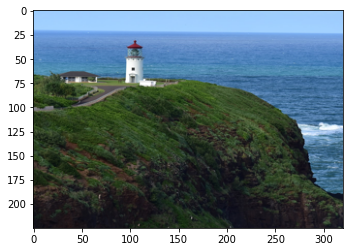

In [17]:
image=Image.open('/content/Sample.jpeg')
image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)

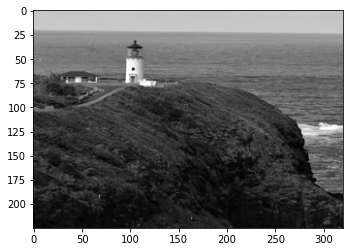

In [18]:
# Making the gray scale of the image
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [19]:
## Segmentasi obyek menjadi 2 bagian yang berbeda berdasarkan nilai threshold yang ditentukan
# What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

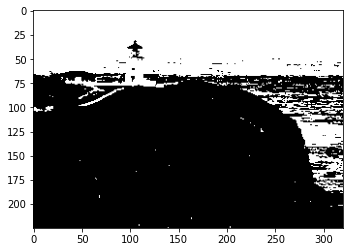

In [20]:
plt.imshow(gray_segmented,cmap='gray')

In [21]:
## Segmentasi obyek menjadi 5 bagian yang berbeda berdasarkan nilai threshold yang ditentukan
# What if we tune the above function more??
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
gray_segmented_2=arr.reshape(gray.shape[0],gray.shape[1])

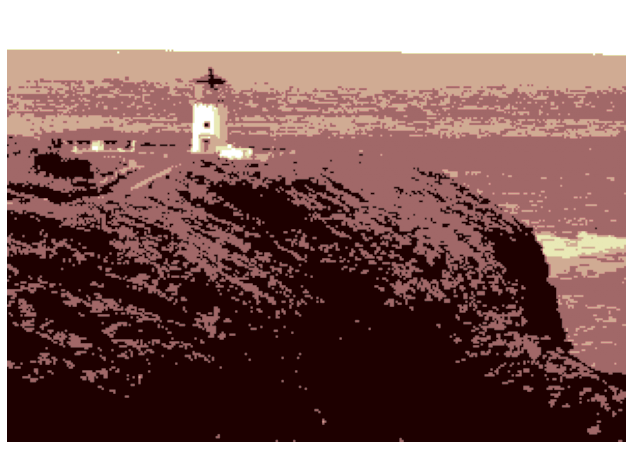

In [22]:
# There are 5 segments in the below image :)
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented_2,cmap='pink')
plt.axis("off")
plt.show()

In [23]:
### Memanfaatkan informasi dari nilai histogram

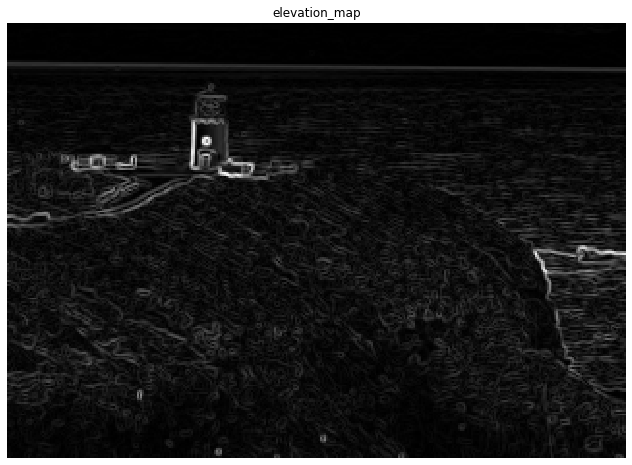

In [24]:
imm=image[:,:,0]
elevation_map = sobel(imm)

fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(elevation_map, cmap='gray', interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()

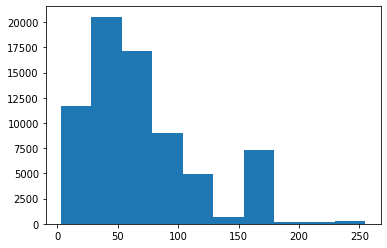

In [25]:
plt.hist(imm.flatten())
plt.show()

Text(0.5, 1.0, 'markers')

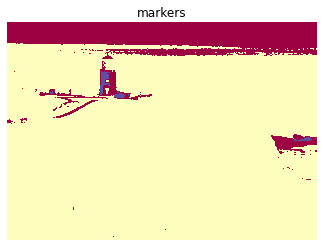

In [26]:
## Melakukan pelabelan terhadap pixel berdasarkan nilai histogram
markers = np.zeros_like(imm)
markers[imm < 117] = 1
markers[imm > 232] = 2

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(markers, cmap='Spectral', interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

Text(0.5, 1.0, 'segmentation')

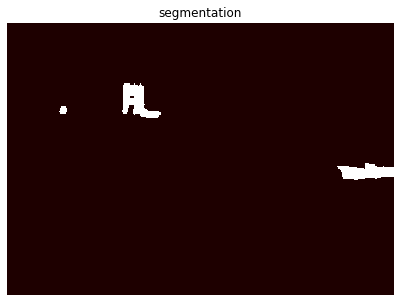

In [27]:
segmentation = skimage.segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(segmentation, cmap='pink',interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

# Pendekatan lain : Segmentasi dengan memanfaatkan nilai cluster dari pixel



In [28]:
im=image/255
pic=im.reshape(im.shape[0]*im.shape[1],im.shape[2])

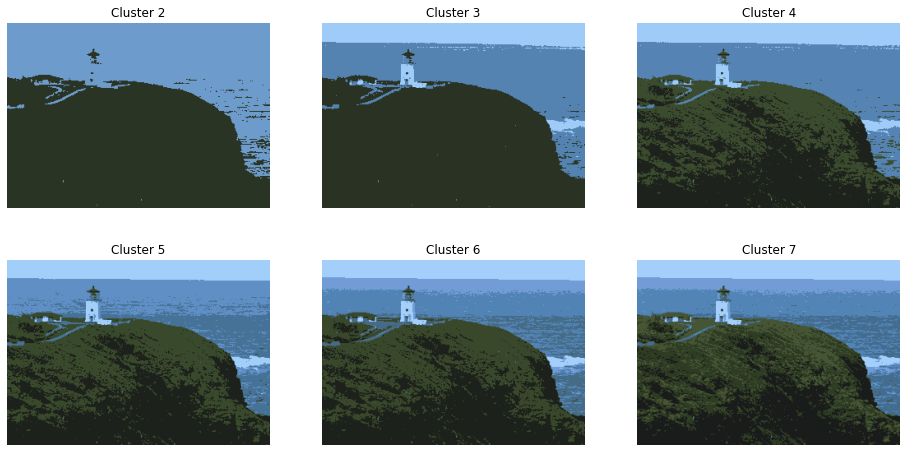

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Cluster '+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()